### **1. 헌법 워드클라우드**

In [2]:
#코드 7-28
!pip install konlpy

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/19.4 MB ? eta -:--:--
   ------- -------------------------------- 3.4/19.4 MB 22.3 MB/s eta 0:00:01
   ------------------------ --------------- 11.8/19.4 MB 28.4 MB/s eta 0:00:01
   ---------------------------------------- 19.4/19.4 MB 39.6 MB/s eta 0:00:00


In [ ]:
#코드 7-29
# 워드클라우드 생성을 위한 클래스 (글자 크기/형태 설정 등)
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 단어 개수를 세는 데 유용한 자료구조 (딕셔너리 기반)
from collections import Counter

# 형태소 분석기: 텍스트에서 명사, 동사 등을 추출하는 데 사용
from konlpy.tag import Okt
import numpy as np

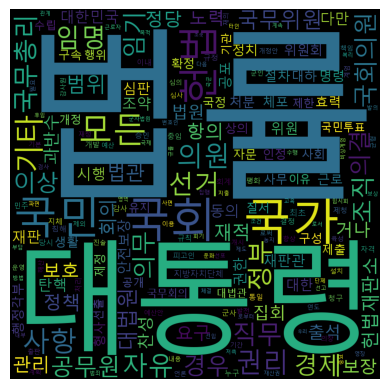

In [10]:
#코드 7-30
# 한글 인식하기위해 jdk 다운 받았음음
# 대한민국헌법.txt 파일을 UTF-8 인코딩으로 읽어와서 변수 text에 저장
with open('대한민국헌법.txt', 'r', encoding='utf-8') as f:
    text = f.read()

# Okt 형태소 분석기 불러오기 (KoNLPy 라이브러리)
okt = Okt()

# 전체 텍스트에서 명사(nouns)만 추출
nouns = okt.nouns(text)

# 길이가 2글자 이상인 명사만 필터링하여 리스트에 저장
words = [n for n in nouns if len(n) > 1]

# 각 단어의 등장 횟수를 세어 Counter 객체에 저장
c = Counter(words)

# 워드클라우드 객체 생성 (폰트 설정 포함)
wc = WordCloud(
    font_path='C:/Windows/Fonts/malgun.ttf',  # 한글 폰트 (맑은 고딕)
    width=400, height=400,                    # 워드클라우드 이미지 크기
    scale=2.0,                                # 고해상도용 배율
    max_font_size=250                         # 최대 글자 크기
)

# 단어 빈도 정보를 기반으로 워드클라우드 생성
gen = wc.generate_from_frequencies(c)

# 워드클라우드 이미지를 화면에 출력
plt.figure()
plt.imshow(gen)           # 이미지 표시
plt.axis('off')           # 축 숨기기 (없으면 숫자 나옴)

# 이미지 파일로 저장
wc.to_file('헌법_워드클라우드.png')